In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

'%.3f'

# matplotlib


([<matplotlib.axis.XTick at 0x11c98f890>,
 [Text(1, 0, 'A'), Text(2, 0, 'B'), Text(3, 0, 'C')])

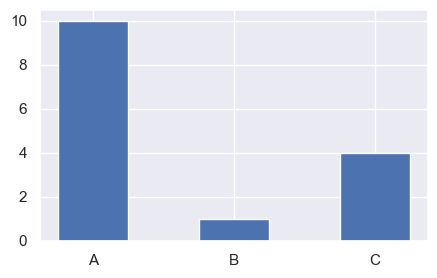

In [9]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.figure(figsize=(5, 3))

plt.bar(x, y, width=0.5)
plt.xticks(x, ["A", "B", "C"])

([<matplotlib.axis.YTick at 0x11cef7110>,
 [Text(0, 1, 'A'), Text(0, 2, 'B'), Text(0, 3, 'C')])

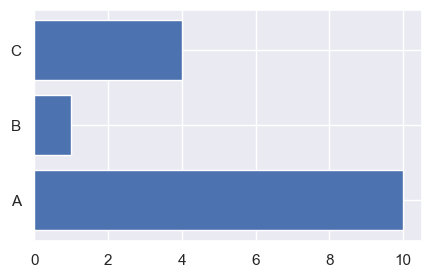

In [12]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.figure(figsize=(5, 3))

plt.barh(x, y)
plt.yticks(x, ["A", "B", "C"])

([<matplotlib.axis.XTick at 0x11d073b50>,
 [Text(0.2, 0, 'A'), Text(1.2, 0, 'B'), Text(2.2, 0, 'C')])

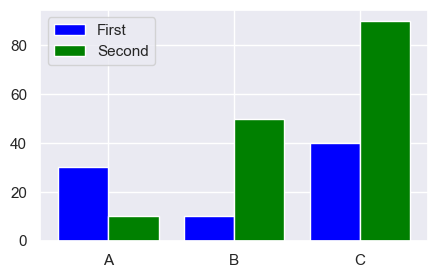

In [18]:
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])
x = np.arange(len(y1))

plt.figure(figsize=(5, 3))

w = 0.4
plt.bar(x, y1, color="blue", width=w, label="First")
plt.bar(x + w, y2, color="green", width=w, label="Second")
plt.legend(loc="best")

plt.xticks(x + w / 2, ["A", "B", "C"])

([<matplotlib.axis.XTick at 0x11d28c750>,
 [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')])

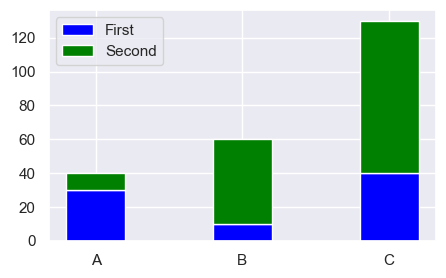

In [21]:
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])
x = np.arange(len(y1))

plt.figure(figsize=(5, 3))

w = 0.4
plt.bar(x, y1, color="blue", width=w, label="First")
plt.bar(x, y2, color="green", bottom=y1, width=w, label="Second")
plt.legend(loc="best")

plt.xticks(x, ["A", "B", "C"])

(-1.105, 1.200, -1.100, 1.100)

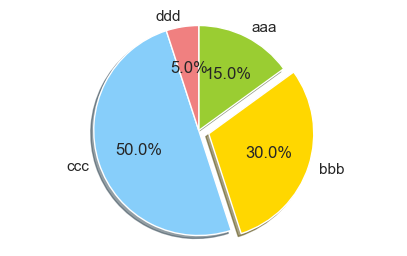

In [28]:
plt.figure(figsize=(5, 3))

sizes = [15, 30, 50, 5]
labels = ["aaa", "bbb", "ccc", "ddd"]
colors = ["yellowgreen", "gold", "lightskyblue", "lightcoral"]
explode = (0, 0.1, 0, 0)

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,  # 真上から
    counterclock=False,  # 時計回り
)
plt.axis("equal")

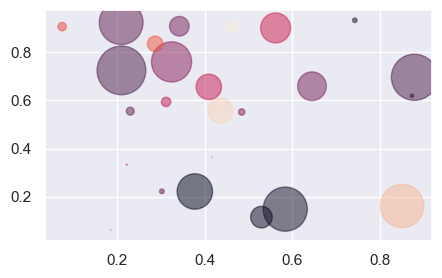

In [30]:
# bubble chart
n = 25
x = np.random.rand(n)
y = np.random.rand(n)

colors = np.random.rand(n)
r = np.random.rand(n) * 20
area = r**2 * np.pi

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

<Axes: >

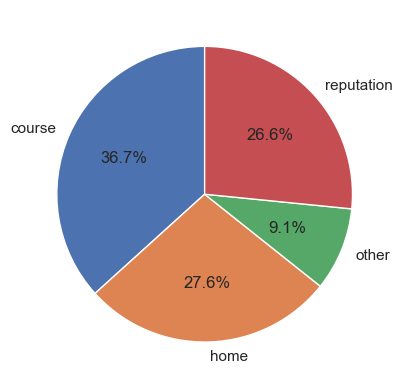

In [43]:
# p190
mat = pd.read_csv("ch03/student-mat.csv", sep=";")
mat.groupby("reason").size().plot(kind="pie", autopct="%1.1f%%", startangle=90)

<Axes: xlabel='higher'>

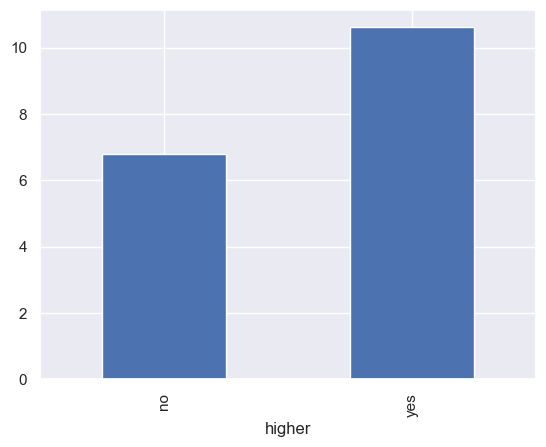

In [45]:
mat.groupby(["higher"])["G3"].mean().plot(kind="bar")

<Axes: ylabel='traveltime'>

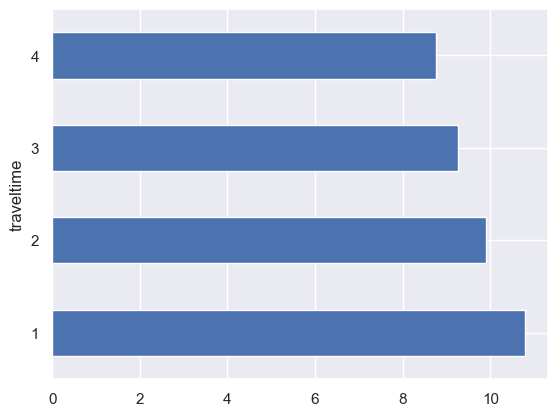

In [46]:
mat.groupby(["traveltime"])["G3"].mean().plot(kind="barh")

In [6]:
# 金融データの可視化
idx = pd.date_range("2015/01/01", "2015/12/31 23:59", freq="T")

dn = np.random.randint(2, size=len(idx)) * 2 - 1  # -1 or 1
rnd_walk = np.cumprod(np.exp(dn * 0.0002))

df = pd.Series(rnd_walk, index=idx).resample("B").ohlc()
df

/var/folders/0j/lsxbrtnx18d4rvgrp55czc700000gn/T/ipykernel_96674/53254218.py:2: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



,open,high,low,close
2015-01-01,1.000200,1.016535,0.994813,1.016535
2015-01-02,1.016332,1.023471,1.004008,1.023062
2015-01-05,1.022857,1.036863,1.021222,1.034999
2015-01-06,1.035206,1.046028,1.029013,1.043312
2015-01-07,1.043520,1.052744,1.042269,1.048332
...,...,...,...,...
2015-12-25,0.762007,0.767053,0.742450,0.744681
2015-12-28,0.744829,0.753520,0.741856,0.746470
2015-12-29,0.746619,0.752315,0.743936,0.749162
2015-12-30,0.749312,0.754274,0.749012,0.751263


<Axes: >

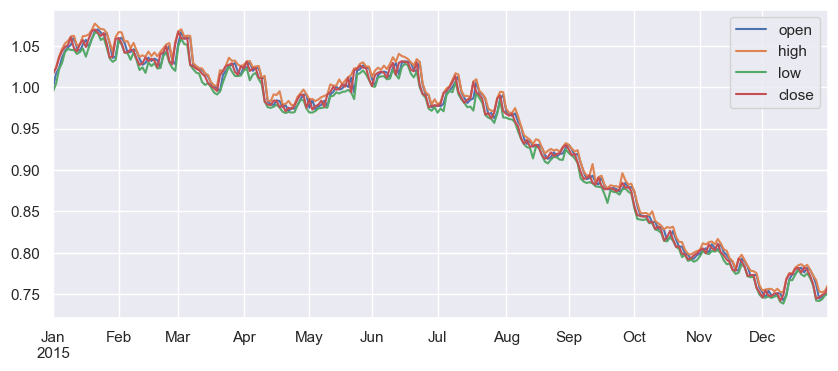

In [7]:
df.plot(figsize=(10, 4), legend="best", grid=True)

In [8]:
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

In [9]:
init_notebook_mode(connected=True)
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates=df.index)
iplot(fig)

/Users/shisotem/dev/tutorials/u-tokyo-datasci/.venv/lib/python3.11/site-packages/plotly/figure_factory/_ohlc.py:29: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/shisotem/dev/tutorials/u-tokyo-datasci/.venv/lib/python3.11/site-packages/plotly/figure_factory/_ohlc.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/shisotem/dev/tutorials/u-tokyo-datasci/.venv/lib/python3.11/site-packages/plotly/figure_factory/_candlestick.py:241: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

# 7 章 総合演習（重要）


## 1: 時系列データ分析


In [ ]:
cd ch07

In [16]:
pwd

'/Users/shisotem/dev/tutorials/u-tokyo-datasci/src/u_tokyo_datasci/ch07'

In [17]:
# 1: データの取得と確認
import io
import requests
import zipfile

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip"
res = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(res.content))
z.extractall()

In [62]:
dow = pd.read_csv("dow_jones_index.data")
dow.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [63]:
dow.info()  # NaN: previous_weeks_volume 720 non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [67]:
# 2: データの加工
# dow[["open", "high", "low", "close"]] = dow[["open", "high", "low", "close"]].map(
#     lambda s: float(s[1:])
# )
# dow.head()

for col_name in ["open", "high", "low", "close", "next_weeks_open", "next_weeks_close"]:
    dow[col_name] = pd.to_numeric(dow[col_name].map(lambda s: str(s).replace("$", "")))

dow.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [68]:
dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    float64
 4   high                                750 non-null    float64
 5   low                                 750 non-null    float64
 6   close                               750 non-null    float64
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [69]:
# import datetime

# dow["date"] = dow["date"].map(
#     lambda s: datetime.date(
#         int(s.split("/")[2]), int(s.split("/")[0]), int(s.split("/")[1])
#     )
# )

dow["date"] = pd.to_datetime(dow["date"])

dow.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [70]:
dow["date"][0]

Timestamp('2011-01-07 00:00:00')

**Point**: set_index -> unstack


In [73]:
# 3: stockごとに、closeについて要約統計量
# dow.groupby(["stock"])["close"].describe()

recomposed_dow = dow.set_index(["date", "stock"])
recomposed_dow = recomposed_dow.unstack()
recomposed_dow

quarter                                    ...  \
stock           AA AXP BA BAC CAT CSCO CVX DD DIS GE  ...   
date                                                  ...   
2011-01-07       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-14       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-21       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-28       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-04       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-11       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-18       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-25       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-04       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-11       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-18       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-25       1   1  1   1   1    1   1  1   1  1  ...   
2011-04-01       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-08       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-15       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-21       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-29       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-06       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-13       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-20       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-27       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-03       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-10       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-17       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-24       2   2  2   2   2    2   2  2   2  2  ...   

           percent_return_next_dividend                                \
stock                               MRK      MSFT       PFE        PG   
date                                                                    
2011-01-07                      1.01740  0.559441  1.090510  0.744186   
2011-01-14                      1.11014  0.565371  1.090510  0.732489   
2011-01-21                      1.12094  0.571021  1.089320  0.804127   
2011-01-28                      1.14908  0.576577  1.101930  0.825545   
2011-02-04                      1.15537  0.576161  1.036270  0.833202   
2011-02-11                      1.14908  0.587156  1.062130  0.818786   
2011-02-18                      1.15677  0.591279  1.042210  0.824261   
2011-02-25                      1.18049  0.602637  1.060450  0.843412   
2011-03-04                      1.14943  0.616570  1.017290  0.854425   
2011-03-11                      1.16101  0.623053  1.027220  0.861929   
2011-03-18                      1.19085  0.645161  0.991080  0.874587   
2011-03-25                      1.16672  0.624512  0.982801  0.870565   
2011-04-01                      1.14908  0.627944  0.981354  0.853737   
2011-04-08                      1.12860  0.613732  0.977517  0.856220   
2011-04-15                      1.10113  0.630666  0.974184  0.825802   
2011-04-21                      1.11633  0.626959  1.010610  0.837680   
2011-04-29                      1.05702  0.617284  0.953743  0.816641   
2011-05-06                      1.04424  0.618477  0.973236  0.812012   
2011-05-13                      1.02481  0.639233  0.956023  0.792701   
2011-05-20                      1.02536  0.653328  0.966651  0.786817   
2011-05-27                      1.04943  0.646204  0.955566  0.800604   
2011-06-03                      1.06086  0.669456  0.959693  0.810026   
2011-06-10                      1.07193  0.675106  0.994530  0.819165   
2011-06-17                      1.07375  0.659522  0.987167  0.819292   
2011-06-24                      1.09986  0.658436  0.996016  0.846781   

                                                                      
stock             T       TRV       UTX       VZ       WMT       XOM  
date                                                                  
2011-01-07  1.49047  0.675042  0.543753  1.3

In [76]:
recomposed_dow["close"].head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28


In [77]:
recomposed_dow["close"].describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [78]:
# 4: closeについて、各stockの相関行列とそのヒートマップ。
recomposed_dow["close"].corr()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


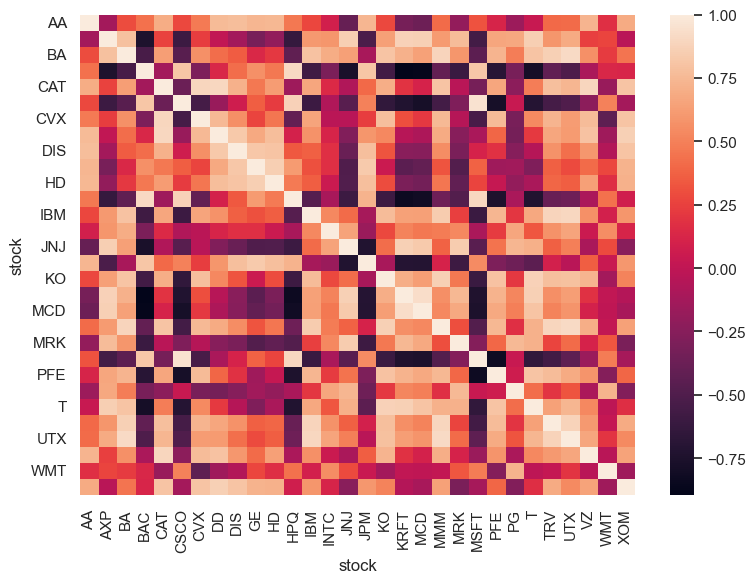

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(recomposed_dow["close"].corr())
plt.tight_layout()
plt.savefig("./close_corr.png")

In [138]:
# 5: 4の中で最も相関係数が高いstockの組は？
close_corr = recomposed_dow["close"].corr()
close_corr

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


In [108]:
diag_nan = close_corr

np.fill_diagonal(diag_nan.values, np.nan)
diag_nan

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,NaN,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,NaN,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,NaN,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,NaN,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,NaN,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,NaN,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,NaN,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,NaN,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,NaN,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


In [147]:
max_pair = ["", "", -np.inf]

for col_name in diag_nan.columns:
    idx_name = diag_nan[col_name].idxmax()
    max_val = diag_nan[col_name].max()
    print(f"{col_name}: {idx_name}, max={max_val}")

    if max_val > max_pair[2]:
        max_pair = [col_name, idx_name, max_val]

max_pair

AA: DIS, max=0.7724697655620214
AXP: KRFT, max=0.8735103611554018
BA: UTX, max=0.9163379610743175
BAC: HPQ, max=0.9058167680009368
CAT: DD, max=0.9028558103078963
CSCO: MSFT, max=0.9537216645891363
CVX: CAT, max=0.8894156562923725
DD: CAT, max=0.9028558103078963
DIS: DD, max=0.8269258130241479
GE: HD, max=0.8582069310150241
HD: GE, max=0.8582069310150241
HPQ: BAC, max=0.9058167680009368
IBM: UTX, max=0.8975523835362527
INTC: BA, max=0.6910939563692001
JNJ: KRFT, max=0.8612879882611022
JPM: GE, max=0.830450859436039
KO: T, max=0.8689952415835719
KRFT: MCD, max=0.9299213037922904
MCD: KRFT, max=0.9299213037922904
MMM: UTX, max=0.9136955626526881
MRK: JNJ, max=0.8440270438854456
MSFT: CSCO, max=0.9537216645891363
PFE: T, max=0.8065439446754143
PG: MRK, max=0.7497131367292446
T: KO, max=0.8689952415835719
TRV: MMM, max=0.8917262016156644
UTX: BA, max=0.9163379610743175
VZ: CAT, max=0.8903147891825172
WMT: PG, max=0.7237055485083292
XOM: DD, max=0.8635107559399797


['CSCO', 'MSFT', 0.954]

<Axes: xlabel='date'>

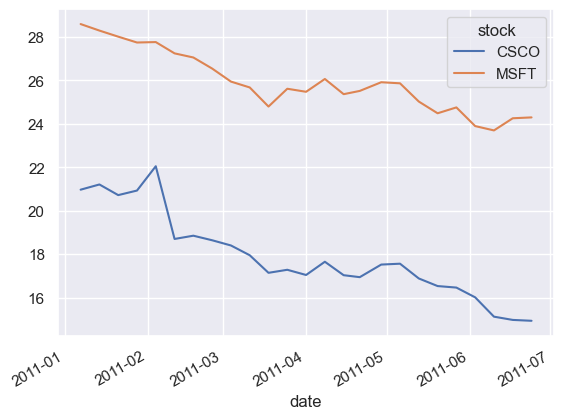

In [148]:
recomposed_dow["close"][max_pair[:2]].plot()

In [155]:
# 6: stock毎に、closeの過去5期（5週間）移動平均時系列データを計算
close_data = recomposed_dow["close"]
close_data.rolling(5).mean().head(10)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-04,16.290,44.858,70.348,14.328,95.152,21.176,93.656,50.146,39.608,19.550,...,34.288,28.088,18.498,64.750,28.214,55.236,80.462,35.656,55.470,78.936
2011-02-11,16.480,45.336,70.900,14.432,97.114,20.722,94.708,51.110,40.400,20.130,...,33.432,27.818,18.596,64.796,28.138,56.368,81.686,35.748,55.792,80.382
2011-02-18,16.742,45.192,71.494,14.332,99.484,20.250,95.886,52.346,41.254,20.654,...,33.156,27.570,18.766,64.550,28.166,57.626,82.872,35.980,55.906,81.714
2011-02-25,16.920,44.698,71.618,14.322,101.334,19.834,97.550,53.490,41.896,20.870,...,32.814,27.276,18.866,63.936,28.126,58.546,83.506,36.184,55.110,82.986
2011-03-04,17.010,44.670,72.132,14.426,102.806,19.328,99.626,54.206,42.836,20.904,...,32.812,26.916,19.168,63.502,28.212,59.220,83.792,36.274,54.184,84.204


増減率 rt = (yt - yt-1) / yt <--- ≈ log(yt / yt-1) として計算することが多い  
ボラティリティ (変動の大きさの指標): 増減率の標準偏差


In [159]:
# 7: stock毎に、closeの1期前との比の対数時系列データを計算。ボラティリティが最大のstockと最小のstockの対数変化率グラフを描画
log_ratio = np.log(close_data / close_data.shift(1))
log_ratio.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,-0.027788,0.041723,0.009896,0.067823,0.002983,0.011380,0.017825,0.000804,-0.004064,0.020940,...,-0.087230,-0.010545,0.000000,0.015843,-0.014665,0.024084,0.000000,-0.013167,0.013408,0.029331
2011-01-21,-0.011335,-0.005420,0.022717,-0.067823,-0.013493,-0.023373,0.010182,-0.029549,0.011388,0.047727,...,-0.009687,-0.009943,0.001090,0.005782,-0.003524,0.006750,0.014064,-0.014487,0.016646,0.014539
2011-01-28,0.021304,-0.047639,-0.034777,-0.046687,0.031102,0.010084,-0.004382,0.039340,-0.022650,0.023036,...,-0.024788,-0.009683,-0.011504,-0.026287,-0.030099,0.014620,0.015220,0.019270,0.017256,0.000127
2011-02-04,0.060734,-0.000912,0.030583,0.049490,0.040052,0.052129,0.039274,0.043578,0.046766,0.017665,...,-0.005458,0.000720,0.061435,-0.009233,0.017310,0.028265,0.013297,0.018905,-0.011887,0.052887


In [161]:
volatility = log_ratio.std()
volatility

stock
AA      0.034676
AXP     0.028556
BA      0.027180
BAC     0.033500
CAT     0.033249
CSCO    0.041205
CVX     0.024619
DD      0.026580
DIS     0.027312
GE      0.025636
HD      0.023361
HPQ     0.040852
IBM     0.018012
INTC    0.031563
JNJ     0.020582
JPM     0.022521
KO      0.016230
KRFT    0.017620
MCD     0.019271
MMM     0.020639
MRK     0.026890
MSFT    0.018652
PFE     0.025661
PG      0.017751
T       0.019030
TRV     0.019285
UTX     0.020710
VZ      0.017758
WMT     0.019249
XOM     0.025403
dtype: float64

vola_max='CSCO', vola_min='KO'


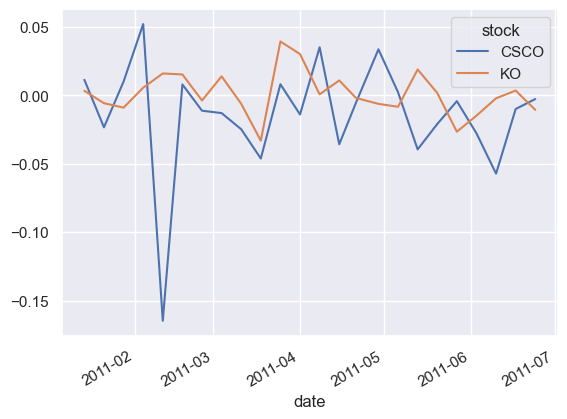

In [180]:
vola_max = volatility.index[volatility.argmax()]
vola_min = volatility.index[volatility.argmin()]
print(f"{vola_max=}, {vola_min=}")

log_ratio[[vola_max, vola_min]].plot()
plt.grid(True)

## 2: マーケティング分析


In [3]:
# 1: データの準備
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
retail_df = pd.ExcelFile(url).parse("Online Retail")  # parseでシートを指定
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
retail_df["cancel_flg"] = retail_df["InvoiceNo"].map(lambda s: str(s)[0])
retail_df.groupby("cancel_flg").size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [5]:
retail_df = retail_df[
    (retail_df["cancel_flg"] == "5") & (retail_df["CustomerID"].notnull())
]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   cancel_flg   397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB


In [6]:
# 2: unique数
for col_name in ["CustomerID", "InvoiceNo", "StockCode", "Description"]:
    # print(f"Num of unique {col_name}: {(~retail_df[col_name].duplicated()).sum()}")
    print(f"Num of unique {col_name}: {len(retail_df[col_name].unique())}")

Num of unique CustomerID: 4339
Num of unique InvoiceNo: 18536
Num of unique StockCode: 3665
Num of unique Description: 3877


In [7]:
# 3: 各国の合計購買金額
retail_df["TotalPrice"] = retail_df["UnitPrice"] * retail_df["Quantity"]
top5 = retail_df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)[:5]
top5.index

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')

In [8]:
# 4: top5の月額推移
top5_df = retail_df[retail_df["Country"].isin(top5.index)]
top5_tp = top5_df.groupby(["InvoiceDate", "Country"], as_index=False)[
    "TotalPrice"
].sum()
top5_tp.head()

,InvoiceDate,Country,TotalPrice
0,2010-12-01 08:26:00,United Kingdom,139.12
1,2010-12-01 08:28:00,United Kingdom,22.20
2,2010-12-01 08:34:00,United Kingdom,348.78
3,2010-12-01 08:35:00,United Kingdom,17.85
4,2010-12-01 08:45:00,France,855.86


In [9]:
recomposed_top5_tp = top5_tp.set_index(["InvoiceDate", "Country"])
recomposed_top5_tp = recomposed_top5_tp.unstack()
recomposed_top5_tp

TotalPrice                                           
Country                   EIRE  France Germany Netherlands United Kingdom
InvoiceDate                                                              
2010-12-01 08:26:00        NaN     NaN     NaN         NaN         139.12
2010-12-01 08:28:00        NaN     NaN     NaN         NaN          22.20
2010-12-01 08:34:00        NaN     NaN     NaN         NaN         348.78
2010-12-01 08:35:00        NaN     NaN     NaN         NaN          17.85
2010-12-01 08:45:00        NaN  855.86     NaN         NaN            NaN
...                        ...     ...     ...         ...            ...
2011-12-09 12:23:00        NaN     NaN     NaN         NaN         124.60
2011-12-09 12:25:00        NaN     NaN     NaN         NaN         140.64
2011-12-09 12:31:00        NaN     NaN     NaN         NaN         329.05
2011-12-09 12:49:00        NaN     NaN     NaN         NaN         339.20
2011-12-09 12:50:00        NaN  249.45     NaN         NaN            NaN

[16687 rows x 5 columns]

In [10]:
recomposed_top5_tp_month = recomposed_top5_tp.resample("ME").sum()
recomposed_top5_tp_month

TotalPrice                                               
Country           EIRE    France   Germany Netherlands United Kingdom
InvoiceDate                                                          
2010-12-31     8813.88   9616.31  15241.14     8784.48     498661.850
2011-01-31    21904.19  17740.12  16910.84    26611.16     442190.060
2011-02-28    10126.52   8515.96   9581.05    23011.91     355655.630
2011-03-31    21674.36  14589.55  14392.69    22416.49     467198.590
2011-04-30     7570.50   5529.61  12315.54     2976.56     409559.141
2011-05-31    15982.19  17614.88  25751.20    29185.88     551568.820
2011-06-30    19835.99  16078.97  13274.10    26858.09     524915.480
2011-07-31    40905.15  10000.19  16440.98       26.02     485612.251
2011-08-31    16967.38  13810.96  19220.77    40327.81     498453.320
2011-09-30    40995.49  23428.04  18091.22    26937.26     796780.272
2011-10-31    24317.92  33485.45  31638.42    40708.65     824766.220
2011-11-30    29473.41  31337.09  28025.02    25874.01     980645.750
2011-12-31     6978.92   7276.92   7984.17    11728.02     472384.170

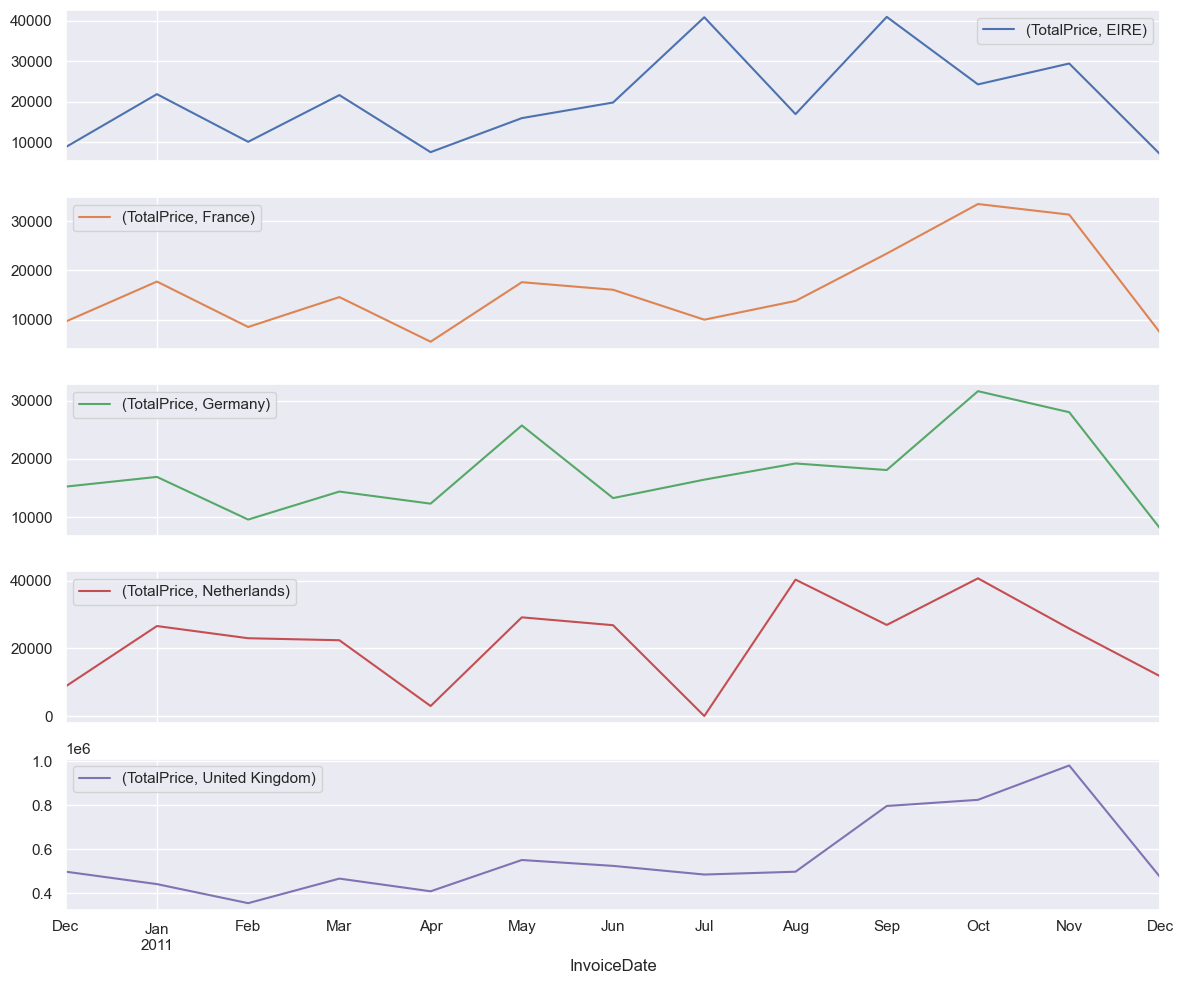

In [11]:
recomposed_top5_tp_month.plot(subplots=True, figsize=(12, 10))
plt.tight_layout()

In [12]:
top5_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34


In [13]:
# 5: 5国売上top5の商品を円グラフにする
items = top5_df[["Description", "Country", "TotalPrice"]]
items = items.groupby(
    ["Description", "Country"], as_index=False
).sum()  # Groupingによる集約で、Descriptionの重複を除去

items

,Description,Country,TotalPrice
0,4 PURPLE FLOCK DINNER CANDLES,EIRE,15.30
1,4 PURPLE FLOCK DINNER CANDLES,United Kingdom,255.46
2,50'S CHRISTMAS GIFT BAG LARGE,EIRE,60.00
3,50'S CHRISTMAS GIFT BAG LARGE,France,15.00
4,50'S CHRISTMAS GIFT BAG LARGE,Germany,75.00
...,...,...,...
9871,ZINC WILLIE WINKIE CANDLE STICK,Netherlands,276.48
9872,ZINC WILLIE WINKIE CANDLE STICK,United Kingdom,1716.87
9873,ZINC WIRE KITCHEN ORGANISER,United Kingdom,146.40
9874,ZINC WIRE SWEETHEART LETTER TRAY,EIRE,10.00


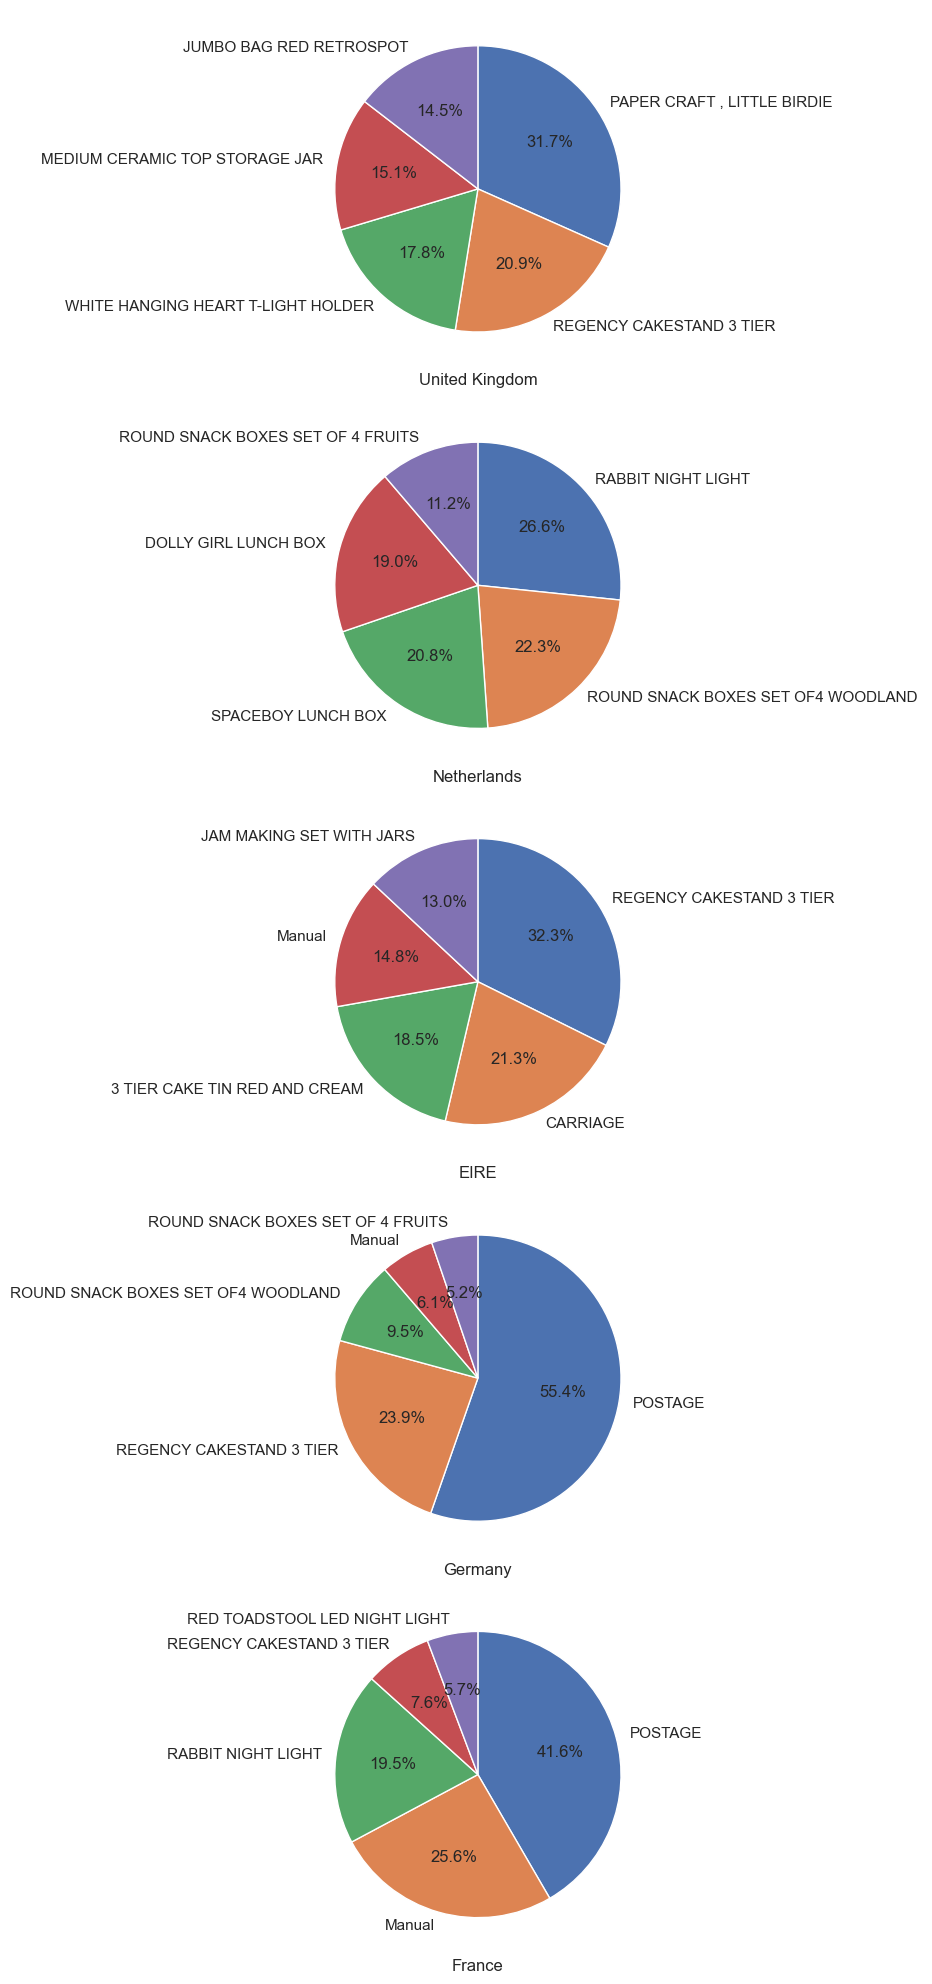

In [19]:
plt.figure(figsize=((25, 20)))
i = 0
for c in top5.index:
    top5_items = items[items["Country"] == c].sort_values(
        by="TotalPrice", ascending=False
    )[:5]
    # print(top5_items)
    plt.subplot(5, 1, i + 1)
    plt.pie(
        top5_items["TotalPrice"],
        labels=top5_items["Description"],
        counterclock=False,
        startangle=90,
        autopct="%.1f%%",
    )
    plt.xlabel(c)
    plt.tight_layout()
    i += 1